# Problem Statement

## Context

Investors face market risk, arising from asset price fluctuations due to economic events, geopolitical developments, and investor sentiment changes. Understanding and analyzing this risk is crucial for informed decision-making and optimizing investment strategies.

## Objective

The objective of this analysis is to conduct Market Risk Analysis on a portfolio of Indian stocks using Python. It uses historical stock price data to understand market volatility and riskiness. Using statistical measures like mean and standard deviation, investors gain a deeper understanding of individual stocks' performance and portfolio variability.

Through this analysis, investors can aim to achieve the following objectives:

1. Risk Assessment: Analyze historical volatility of individual stocks and the overall portfolio.
2. Portfolio Optimization: Use Market Risk Analysis insights to enhance risk-adjusted returns.
3. Performance Evaluation: Assess portfolio management strategies' effectiveness in mitigating market risk.
4. Portfolio Performance Monitoring: Monitor portfolio performance over time and adjust as market conditions and risk preferences change.

## Data Dictionary

The dataset contains weekly stock price data for 5 Indian stocks over an 8-year period. The dataset enables us to analyze the historical performance of individual stocks and the overall market dynamics.

# Importing necessary Libraries

In [18]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Read the data
df = pd.read_csv('/content/drive/MyDrive/PGPDSA/Market_Risk_Data_coded.csv')
#returns first 5 rows
df.head(5)

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


# Overview of the Dataset

In [6]:
df.shape

(418, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC Limited    418 non-null    int64 
 2   Bharti Airtel  418 non-null    int64 
 3   Tata Motors    418 non-null    int64 
 4   DLF Limited    418 non-null    int64 
 5   Yes Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


In [8]:
df.describe()

,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,278.964115,528.260766,368.617225,276.827751,124.442584
std,75.114405,226.507879,182.024419,156.280781,130.090884
min,156.000000,261.000000,65.000000,110.000000,11.000000
25%,224.250000,334.000000,186.000000,166.250000,16.000000
50%,265.500000,478.000000,399.500000,213.000000,30.000000
75%,304.000000,706.750000,466.000000,360.500000,249.750000
max,493.000000,1236.000000,1035.000000,928.000000,397.000000


*	Yes Bank's Volatility: Yes Bank exhibits the highest standard deviation (130.09) among the five stocks, confirming its higher volatility and risk compared to the others. This aligns with our previous observations.
*	ITC's Stability: ITC demonstrates the lowest standard deviation (75.11), indicating its relative price stability and lower risk profile.
*	Bharti Airtel's High Growth and Volatility: Bharti Airtel has the highest mean price (528.26) and a substantial standard deviation (226.51), suggesting a growth-oriented stock with significant price fluctuations.
*	Tata Motors' Wide Price Range: Tata Motors has a considerable range between its minimum and maximum prices (65 to 1035), highlighting its price volatility and potential for significant swings.
*	DLF's Moderate Profile: DLF falls in the middle ground with moderate mean price (276.83) and standard deviation (156.28), indicating a balance between growth and stability compared to the extremes.
*	Price Distribution: By comparing the mean and median (50%) values, we can get a sense of the price distribution. If the mean is higher than the median, it suggests that the price distribution might be skewed to the right (i.e., there are more instances of prices on the higher end). This seems to be the case for Bharti Airtel, Tata Motors, and DLF.
*	Impact of COVID: The minimum prices likely reflect the impact of the COVID-19 market crash in 2020. Yes Bank and Tata Motors were particularly affected, reaching very low price points.


In [9]:
df.isnull().sum()

,0
Date,0
ITC Limited,0
Bharti Airtel,0
Tata Motors,0
DLF Limited,0
Yes Bank,0


In [10]:
df['Date'] = pd.to_datetime(df['Date'])  ## Convert Date column from object to datetime

df.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,2016-03-28,217,316,386,114,173
1,2016-04-04,218,302,386,121,171
2,2016-04-11,215,308,374,120,171
3,2016-04-18,223,320,408,122,172
4,2016-04-25,214,319,418,122,175


# Stock Price Analysis

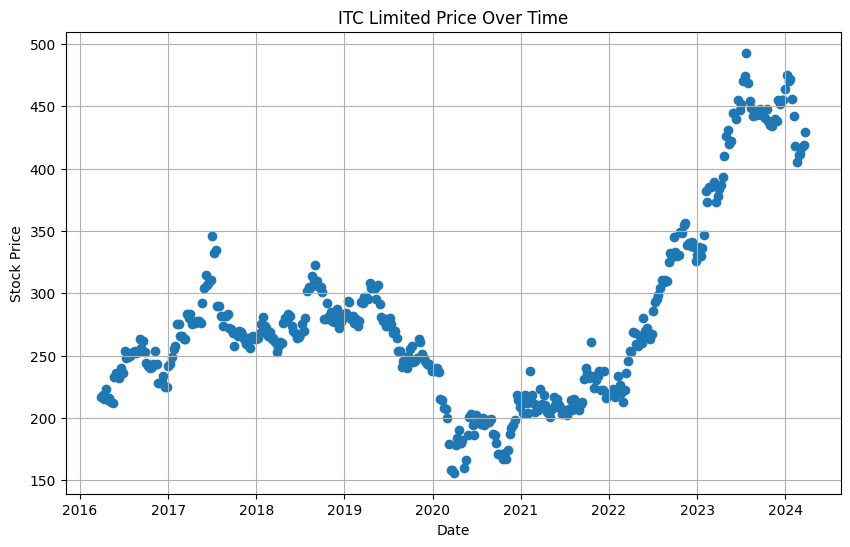

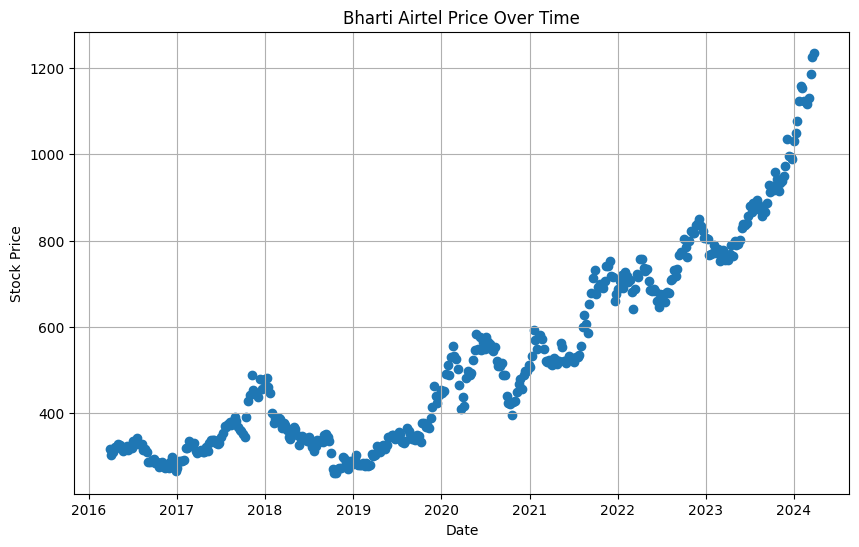

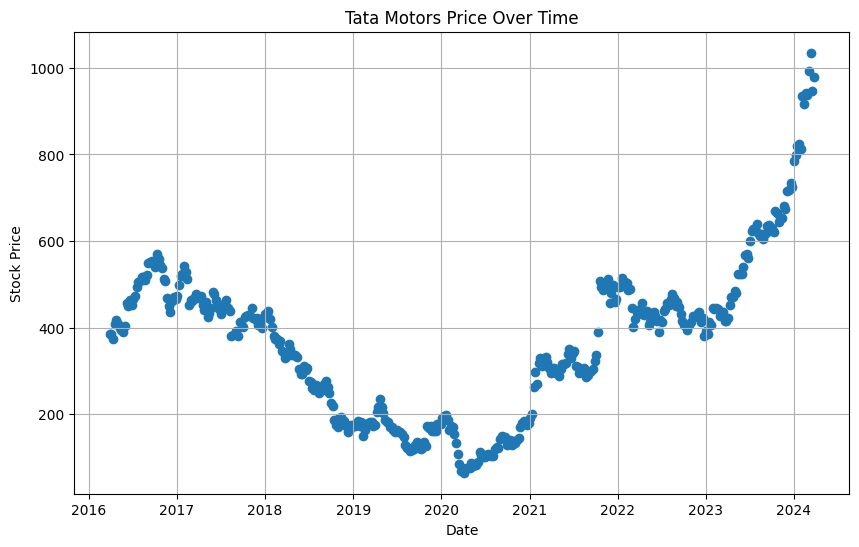

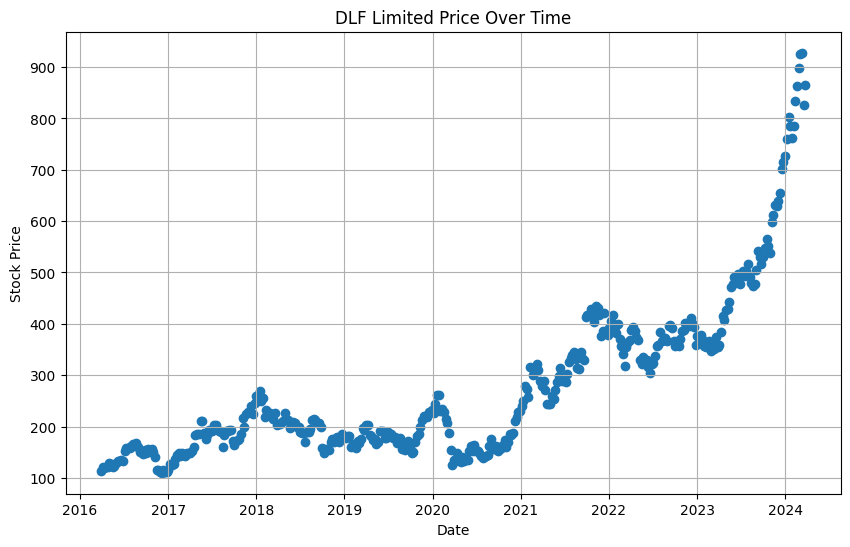

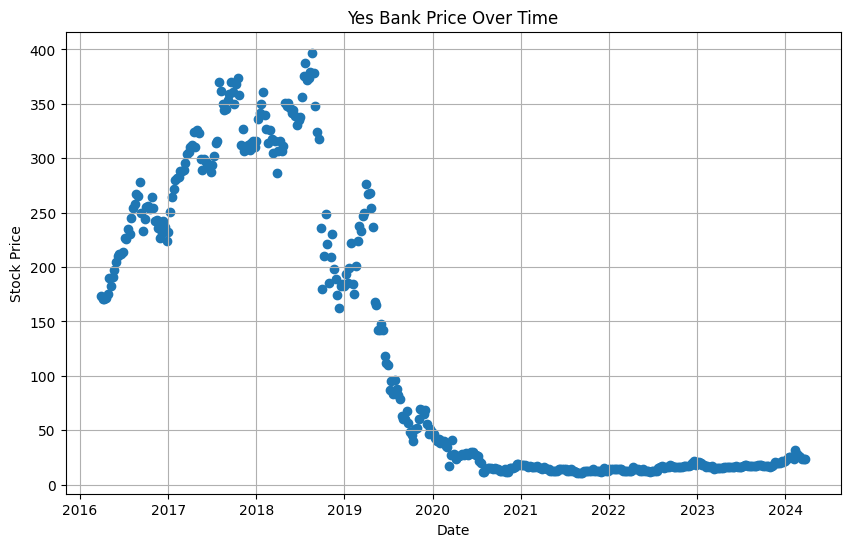

In [11]:
numeric_columns = df.select_dtypes(include=['number']).columns

for i, stock in enumerate(numeric_columns):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Date'], df[stock])
    plt.title(f'{stock} Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.show()

##**Inference**
**ITC Limited**
* Started around 220-250 rupees in 2016, experienced multiple phases including stable sideways movement until 2019, survived COVID crash of 2020 (dropped to 150), and currently trades at premium levels of 400-450
* Witnessed distinct phases: stable sideways trading (2016-2019), sharp COVID decline (2020), recovery and consolidation (2021-2022), and strong uptrend reaching near 500 (2022-2024)
* Demonstrates evolving risk profile with higher volatility at current elevated prices, showing maximum stress during 2020 crash (40% decline), but also aggressive growth in recent years
* Generated substantial returns with nearly 100% appreciation from 2020 lows, offering significant gains for long-term investors, with most notable growth occurring during 2022-2024
* Currently trading near historical highs (400-450) with recent consolidation phase, suggesting potential market indecision and need for careful risk management at these levels

**Bharti Airtel**

* Shows remarkable growth trajectory from around 300 rupees in 2016 to over 1200 rupees in 2024, with multiple price cycles of consolidation and breakouts throughout this period
* Demonstrated resilience during the 2020 market crash, showing a relatively smaller decline compared to broader market, followed by a strong recovery and sustained uptrend from 2020 onwards
* Experienced a significant acceleration in price momentum from 2022-2024, rising from around 700 levels to 1200+, indicating strong investor confidence and sector growth potential
* Exhibits a pattern of higher lows and higher highs since 2019, suggesting a robust long-term uptrend with each consolidation phase followed by new price discoveries
* Currently trading at all-time highs near 1200 rupees with strong momentum, showing a particularly steep ascent in recent months of 2023-2024, though this rapid rise might suggest increased short-term volatility risk

**Tata Motors**

* Displays high volatility with significant price swings, starting from around 400 rupees in 2016, experiencing a major decline to 100 levels in 2020, and then showing an impressive recovery to reach 1000+ rupees by 2024
* Faced substantial downward pressure from 2017-2020, dropping from peaks of around 550 rupees to lows near 100 rupees, marking a period of severe stress in the auto sector and overall market conditions
* Demonstrated remarkable recovery post-2020 COVID lows, with the stock price rising nearly 10x from its bottom, showing strong business turnaround and investor confidence
* Exhibited a period of consolidation during 2022-2023 around 400-500 levels before breaking out strongly in late 2023, suggesting renewed market interest and sector optimism
* Currently showing powerful upward momentum reaching all-time highs above 1000 rupees, though the steep ascent might indicate potential for increased volatility and profit-taking

**DLF Limited**

* Shows a remarkable transformation from trading around 100-200 rupees during 2016-2020 to experiencing an extraordinary rally reaching 900+ rupees by 2024, representing nearly a 9x return
* Demonstrated resilience during the 2020 market crash with a relatively modest decline, followed by a steady uptrend from 2021 onwards as real estate sector sentiment improved
* Maintained a gradual upward trajectory from 2021-2022 between 300-400 levels, before entering a brief consolidation phase in early 2023
* Exhibited explosive growth in late 2023 and early 2024, with prices more than doubling from 400 to 900+ levels, indicating strong investor confidence in the real estate sector
* Currently trading at all-time highs with steep upward momentum, though the rapid price appreciation might suggest increased volatility risk and potential for consolidation

**Yes Bank**

* High Volatility: The stock price of Yes Bank exhibits high volatility, with sharp fluctuations and dramatic swings over the 8-year period. This indicates a higher level of risk compared to more stable stocks.

* Phases of Growth and Decline: The stock price experienced distinct phases, including an initial growth phase, followed by a sharp decline, and then a period of relative stability at low levels. This suggests that the bank's performance has been influenced by various factors, potentially including changes in investor sentiment, financial performance, and external events.

* Potential Risk Factors: The high volatility and fluctuations in the stock price can be attributed to a combination of company-specific risks (e.g., mismanagement, financial irregularities), industry-specific risks (e.g., changes in banking regulations, competition), and market risks (e.g., economic downturns, changes in investor sentiment).

* Need for Thorough Risk Assessment: The high volatility of Yes Bank's stock price underscores the need for a thorough risk assessment before considering investing in the stock. Investors should carefully evaluate their risk tolerance and consider the potential for significant losses.

* Importance of Monitoring and Evaluation: Given the stock's volatile nature, continuous monitoring and evaluation of Yes Bank's performance are crucial for investors. This includes staying informed about the bank's financial health, industry trends, and market conditions.

# Returns and Volatility Analysis


## Return Calculation

In [13]:
Return_of_Stocks =  np.log(df.drop(['Date'],axis=1)).diff(axis = 0)

pd.set_option('display.max_rows', None)

Return_of_Stocks

,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,NaN,NaN,NaN,NaN,NaN
1,0.004598,-0.045315,0.000000,0.059592,-0.011628
2,-0.013857,0.019673,-0.031582,-0.008299,0.000000
3,0.036534,0.038221,0.087011,0.016529,0.005831
4,-0.041196,-0.003130,0.024214,0.000000,0.017291
5,0.009302,0.024769,-0.024214,0.055791,0.082238
6,-0.013986,-0.006135,-0.019803,-0.015625,-0.037538
7,-0.004706,-0.015504,-0.015114,-0.040166,0.042787
8,0.094452,-0.025318,-0.012772,0.016261,0.030930
9,0.012793,0.019048,0.040308,0.039531,0.039806


##**Inference**
* Yes Bank's High Volatility Confirmed: As expected from the price chart showed earlier, Yes Bank likely exhibits the highest standard deviation (and variance) of weekly returns. This confirms its higher risk profile compared to the other stocks in the dataset.  

* Relative Stability of ITC:  ITC, often considered a more stable, defensive stock, likely demonstrates the lowest volatility among the five.  Its weekly returns probably cluster closer to zero compared to the others.  Again, calculate the standard deviations to confirm.

* Potential for Correlation:  Visual inspection might suggest some degree of correlation between certain stocks. For example, Tata Motors and DLF (both potentially sensitive to economic cycles) might show some positive correlation (tend to move in the same direction).  Calculating correlation coefficients is essential to quantify these relationships.

* Periods of Market Volatility: Look for weeks (rows) where the returns for all or most stocks show larger swings (both positive and negative). These weeks likely correspond to periods of heightened market uncertainty, perhaps triggered by macroeconomic news, policy changes, or global events.

* Impact of Specific Events:  If we have the corresponding dates for the weekly returns, we can start to investigate if particular events (e.g., a major regulatory change in the banking sector, a significant economic announcement) correlate with large swings in the returns of specific stocks.

* Risk-Return Trade-off:  While we can't calculate a true Sharpe Ratio without risk-free rates, you can start to visualize the risk-return trade-off.  Plotting the average weekly return (y-axis) against the standard deviation of weekly returns (x-axis) for each stock will visually show this relationship.  Higher return usually comes with higher risk.

* Limitations of the Data: These inferences are based on historical returns.  Past performance is not indicative of future results.  Also, weekly data might not capture very short-term (daily) volatility or very long-term trends.


## Average Returns

In [14]:
StockMeans = Return_of_Stocks.mean()
StockMeans.sort_values()

,0
Yes Bank,-0.004737
ITC Limited,0.001634
Tata Motors,0.002234
Bharti Airtel,0.003271
DLF Limited,0.004863


## **Inference**

* Yes Bank's Negative Average Return: Yes Bank has a negative average weekly log return of -0.004737.  This implies that, on average, the stock price has decreased slightly each week over the period covered by your data. This aligns with the visual decline you saw in the Yes Bank price chart.  It suggests a negative overall trend for Yes Bank during this timeframe.

* Positive Average Returns for Other Stocks: The other four stocks (ITC, Tata Motors, Bharti Airtel, and DLF) all have positive average weekly log returns. This indicates that, on average, their prices have increased over the weeks in your dataset.

* DLF as Top Performer (on average): DLF Limited shows the highest average weekly log return (0.004863) among the five.  This suggests it has been the best performer, on average, over the given period.

* Bharti Airtel and Tata Motors: These stocks have moderate positive average weekly returns, suggesting steady, though not spectacular, growth on average.

* ITC's Modest Positive Return: ITC has a slightly positive average return, but it's the lowest among the four positive return stocks.  This could imply slower but potentially more stable growth.


## Volatility

In [15]:
StockStdDev = Return_of_Stocks.std()
StockStdDev.sort_values()

,0
ITC Limited,0.035904
Bharti Airtel,0.038728
DLF Limited,0.057785
Tata Motors,0.060484
Yes Bank,0.093879


##**Inference**
* Yes Bank's Highest Volatility (Risk): Yes Bank has the highest standard deviation of weekly log returns (0.093879).  This confirms its higher volatility and, therefore, higher risk compared to the other stocks in the dataset.  This aligns with both the price chart showed earlier and the negative average return discussed.

* ITC's Lowest Volatility (Risk): ITC Limited exhibits the lowest standard deviation (0.035904), indicating the lowest volatility and, consequently, the lowest risk among the five stocks.  This is consistent with ITC's reputation as a more stable, defensive stock.

* Bharti Airtel's Relatively Low Volatility: Bharti Airtel also has a relatively low standard deviation, suggesting moderate risk.

* DLF and Tata Motors' Moderate Volatility: DLF Limited and Tata Motors show moderate levels of volatility, higher than ITC and Bharti Airtel but lower than Yes Bank.  DLF has slightly lower volatility than Tata Motors.


## Visualizing Returns and Volatility

In [16]:
data = pd.DataFrame({'Mean': Return_of_Stocks.mean(), 'Std Dev': Return_of_Stocks.std()})
data

,Mean,Std Dev
ITC Limited,0.001634,0.035904
Bharti Airtel,0.003271,0.038728
Tata Motors,0.002234,0.060484
DLF Limited,0.004863,0.057785
Yes Bank,-0.004737,0.093879


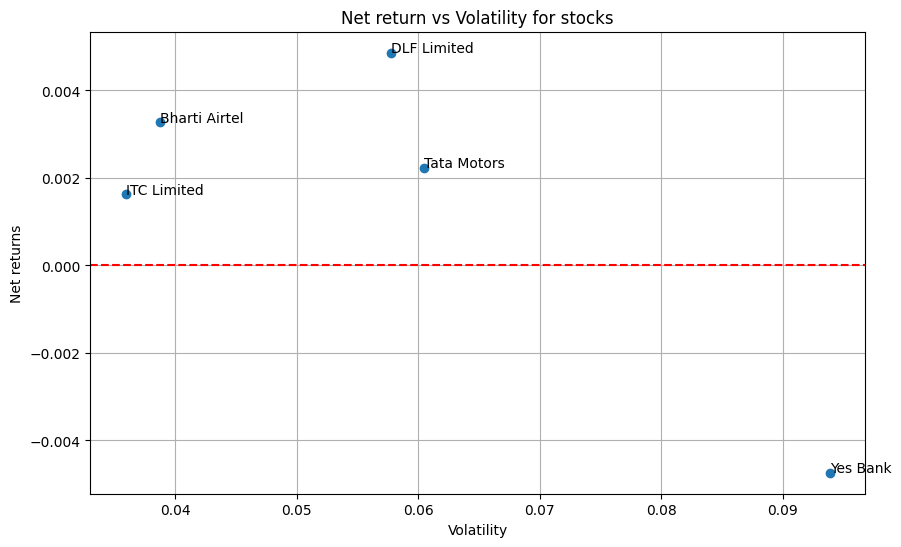

In [17]:


fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.scatter(data['Std Dev'], data['Mean'])
plt.axhline(y=0,linestyle='--', color = "red")

for index, row in data.iterrows():
    ax.text(row['Std Dev'], row['Mean'], index)
plt.xlabel('Volatility')
plt.ylabel('Net returns')
plt.title('Net return vs Volatility for stocks')
plt.grid()
plt.show()

##**Inference**
* Yes Bank: High Risk, Negative Return: Yes Bank is located in the bottom-right corner of the plot. This clearly indicates that it has the highest volatility (highest standard deviation of returns) and a negative average return among the five stocks.  This confirms our previous observations and highlights the high-risk, low-return profile of Yes Bank over the analyzed period.

* DLF Limited: High Return, Moderate Risk: DLF Limited is situated in the top-center of the plot. This suggests it has the highest average return among the stocks and a moderate level of volatility. This makes it a potentially attractive investment if an investor is seeking higher returns and is comfortable with a moderate level of risk.

* ITC Limited: Low Risk, Low Return: ITC Limited is located in the bottom-left corner, close to the origin. This implies that it has the lowest volatility (lowest risk) and a low average return compared to the other stocks.  This is typical of defensive stocks like ITC, which are often favored by risk-averse investors.

* Bharti Airtel and Tata Motors: Moderate Risk and Return: Bharti Airtel and Tata Motors are located in the mid-range area of the plot, suggesting moderate levels of both risk and return.  Their specific placement relative to each other indicates their relative risk and return profiles.

* Risk-Return Trade-off: The plot visually represents the risk-return trade-off.  Generally, stocks with higher returns also tend to have higher volatility (risk).  Investors need to balance their desired level of return with their tolerance for risk.

* Red Horizontal Line (Zero Return): The red horizontal line at zero return helps to quickly distinguish stocks with positive average returns (above the line) from those with negative average returns (below the line).


# Conclusions and Recommendations

**Key Conclusions:**

* Diverse Risk-Return Spectrum: The stocks span a wide range of risk and return characteristics. Yes Bank demonstrates the highest risk (volatility) and a negative average return, making it a clear outlier. ITC exhibits the lowest risk and a modest return. Bharti Airtel, Tata Motors, and DLF occupy the middle ground, offering higher returns at the cost of increased volatility.
* Growth vs. Stability: Bharti Airtel and DLF are growth-oriented, having delivered substantial returns, particularly since 2020. However, this growth is accompanied by higher volatility. ITC prioritizes stability, providing more consistent, albeit lower, returns. Tata Motors exhibits a more cyclical pattern, influenced by the automotive sector's inherent volatility.
* Sectoral Influence: Stock performance is strongly tied to sector-specific dynamics. Bharti Airtel benefits from the expanding telecom sector, DLF from the real estate market, and Tata Motors from the automotive industry's cyclical nature. ITC's diversified business provides exposure to a broader range of economic factors.
* Yes Bank's Unique Challenges: Yes Bank's high volatility and negative average return point to significant challenges, likely stemming from company-specific issues and past financial instability.

**Investment Recommendations**:

* Risk Alignment: Investment decisions should be carefully aligned with individual risk tolerance. ITC is suitable for risk-averse investors, while Bharti Airtel, DLF, and, to a lesser extent, Tata Motors, are more appropriate for those with a higher risk appetite. Yes Bank should only be considered by investors with a very high-risk tolerance and a deep understanding of the bank's turnaround efforts.
* Diversification: Building a diversified portfolio across these stocks can optimize the risk-return trade-off. Combining stable stocks like ITC with higher-growth potential stocks like Bharti Airtel or DLF can create a balanced portfolio.
* Long-Term Perspective: A long-term investment horizon is particularly advisable for Bharti Airtel and DLF, given their demonstrated growth potential. This allows investors to ride out short-term fluctuations and capitalize on long-term trends.
* Entry and Exit Strategies: Careful consideration of entry and exit points is essential, especially for stocks trading near all-time highs. Implementing strategies like staggered entry, profit-taking targets, and stop-loss orders can help manage risk.
* Fundamental Research: Quantitative analysis should be complemented by thorough fundamental research. Understanding the financial health, competitive positioning, and growth prospects of each company is crucial for making informed investment decisions.
* Market Awareness: Staying informed about broader market trends, sector-specific developments, and macroeconomic factors is essential for adapting investment strategies as needed.
* Continuous Monitoring: Regularly monitor portfolio performance, rebalance periodically to maintain desired asset allocation, and revisit investment theses based on new information.

**Specific Stock Recommendations:**

* ITC: Recommended for risk-averse investors seeking stable, long-term growth with lower volatility. Consider accumulating during market corrections.
* Bharti Airtel: Recommended for investors with a higher risk tolerance seeking substantial growth potential in the telecom sector. Be prepared for potential price swings and consider a long-term investment horizon.
* Tata Motors: Suitable for investors with a higher risk tolerance who are optimistic about the automotive sector's long-term prospects. Be mindful of the stock's cyclical nature and potential for price volatility.
* DLF Limited: Attractive for investors with a higher risk tolerance seeking significant returns in the real estate sector. Be aware of the increased volatility associated with rapid price appreciation.
* Yes Bank: Only suitable for investors with a very high-risk tolerance and a deep understanding of the bank's specific challenges and potential turnaround. Extensive due diligence is strongly advised.